In [1]:
!pip install pyrenn

In [2]:
!pip install neurolab

In [3]:
from matplotlib import pyplot as plt
import math
import numpy as np
import seaborn as sns
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import neurolab as nl
import pyrenn
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def elipse(a, b, t, f, x0, y0):
  x = x0 + a * np.cos(t) * np.cos(f) - b * np.sin(t) * np.sin(f)
  y = y0 + a * np.cos(t) * np.sin(f) + b * np.sin(t) * np.cos(f)
  return x, y

In [30]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 
X, y = elipse(0.5, 0.5, t, np.pi/6, 0.2,-0.1)

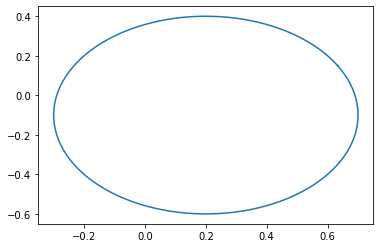

In [31]:
plt.plot(X, y)

In [62]:
nn = pyrenn.CreateNN([2,1,2]) #по краям вход-выход, посередине число нейронов скрытого слоя
nn = pyrenn.train_LM(np.array([X, y]),np.array([X, y]), nn, E_stop=1e-5, k_max=1000)

Maximum number of iterations reached


In [67]:
pred = pyrenn.NNOut(np.array([X, y]), nn)

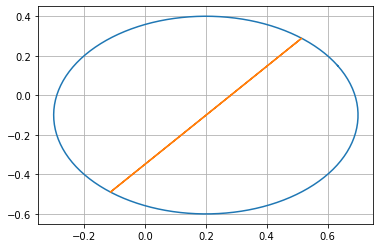

In [68]:
plt.plot(X, y)
plt.plot(pred[0], pred[1])
plt.grid(True)

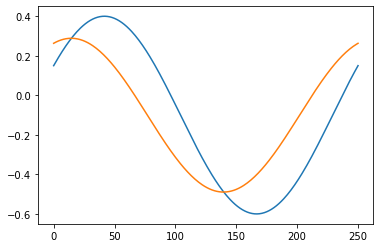

In [69]:
plt.plot(y)
plt.plot(pred[1])

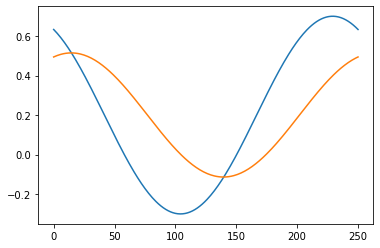

In [70]:
plt.plot(X)
plt.plot(pred[0])

In [72]:
#2 задание
t = np.linspace(0.01, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 

def r(t):
  return 1 / np.sqrt(t)

X = r(t) * np.cos(t)
y = r(t) * np.sin(t)

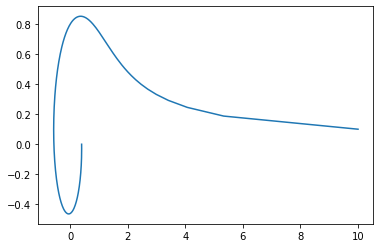

In [73]:
plt.plot(X, y)

In [81]:
nn2 = pyrenn.CreateNN([1, 11, 1, 11, 1]) #аналогично по краям вход-выход

In [82]:
nn2 = pyrenn.train_LM(X, y, nn2, E_stop=1e-5, k_max=2000)

Maximum number of iterations reached


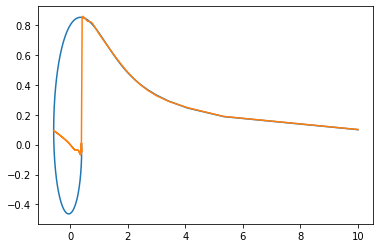

In [84]:
plt.plot(X, y)
plt.plot(X, pyrenn.NNOut(X, nn2))

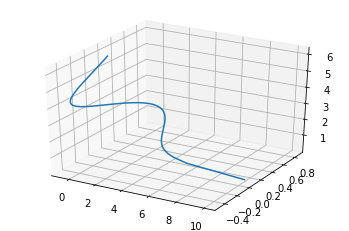

In [91]:
#3 задание
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X, y, t)

In [107]:
nn3 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn3 = pyrenn.train_LM(np.array([X, t]), y, nn3, E_stop=1e-5, k_max=500)

Termination Error reached


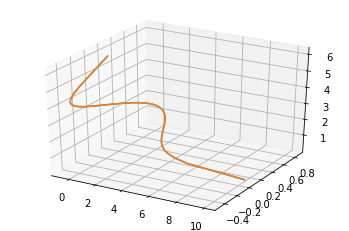

In [108]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X, y, t)
ax.plot(X, pyrenn.NNOut(np.array([X, t]), nn3), t)